## CodersCave

## Task1:Email Spam Detection
## Name:MB Hariharan

### import libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)


### Importing Dataset

In [4]:
data =pd.read_csv(r"C:\Users\91760\Downloads\spam_ham_dataset.csv")

In [5]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [11]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [13]:
data.shape

(5171, 4)

### Data preprocessing

In [16]:
del data['Unnamed: 0']


In [34]:
data.rename(columns={'label':'target','text':'text'},inplace=True)
data.head()

,target,text,label_num,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [35]:
data.replace({'target':{'ham':0,'spam':1}},inplace=True)
data.head()


,target,text,label_num,length
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [36]:
data.duplicated().sum()

178

In [37]:
data.shape

(5171, 4)

## Exploratary Data Analysis

In [41]:
data.head()

,target,text,label_num,length
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336


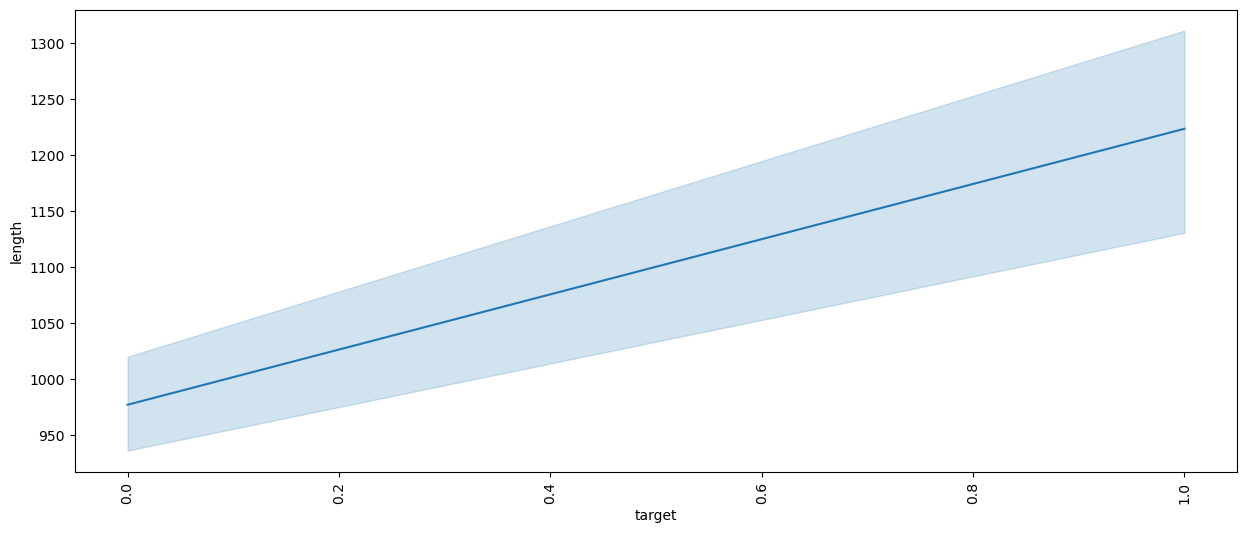

In [39]:

plt.figure(figsize=(15,6))
sns.lineplot(x=data['target'],y=data['length'],data=data,palette='his')
plt.xticks(rotation=90)
plt.show()

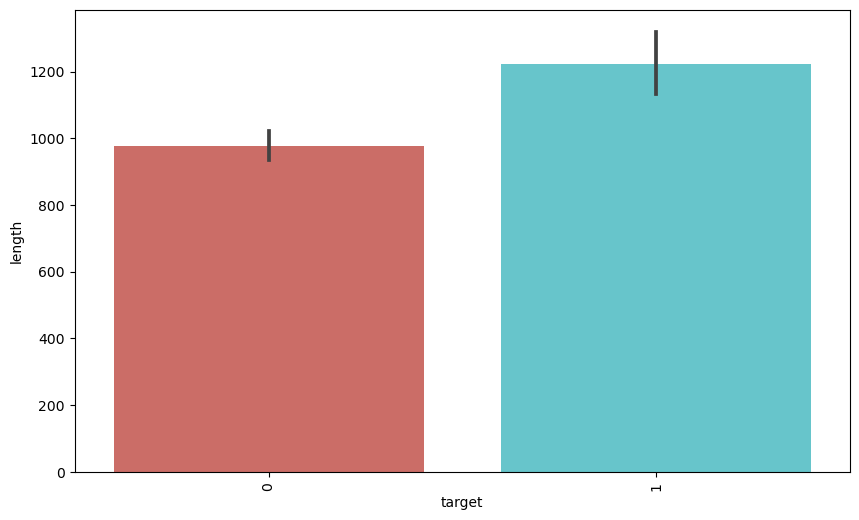

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['target'],y=data['length'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()


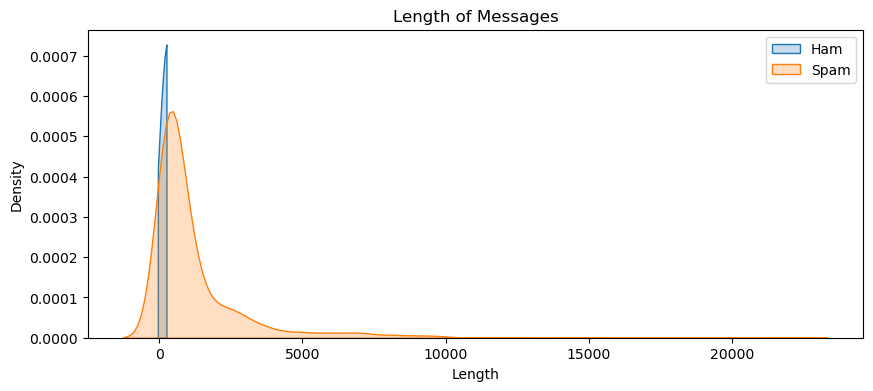

In [46]:
fig, ax = plt.subplots(figsize=(10,4))
sns.kdeplot(data.loc[data.target==0,"length"],shade=True,label="Ham",clip=(-50,250))
sns.kdeplot(data.loc[data.target==1,"length"],shade=True,label="Spam")
ax.set(xlabel="Length",ylabel="Density",title="Length of Messages")
ax.legend(loc="upper right")
plt.show()


### splitting the data

In [50]:
x=data['text']
x.head()

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object

In [51]:
y=data["target"]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() 
trainCV=cv.fit_transform(x_train)
testCV=cv.transform(x_test)


### Performing Support Vector Machine 

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier_svm_linear=SVC(kernel='linear')
classifier_svm_linear.fit(trainCV,y_train)
pred_svm_linear=classifier_svm_linear.predict(testCV)


In [56]:

Accuracy_Score_SVM_Linear=accuracy_score(y_test,pred_svm_linear)
Accuracy_Score_SVM_Linear

0.9623188405797102

In [61]:
print("Support Vector Machine Linear=",Accuracy_Score_SVM_Linear)

Support Vector Machine Linear= 0.9623188405797102


## Performing decision tree classifier

In [57]:

from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(trainCV,y_train)
pred_dt=classifier_dt.predict(testCV)



In [58]:

Accuracy_Score_dt=accuracy_score(y_test,pred_dt)
Accuracy_Score_dt



0.9536231884057971

In [63]:
print("Decision Tree Classifier=",Accuracy_Score_dt)

Decision Tree Classifier= 0.9536231884057971
